In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df = pd.read_csv("../data/fbref_PL_2024-25.csv")

x_col="Gls"
y_col="xG"
size_col="Min"
size_scale=20
alpha=.6
top_pct=.85

df_filtered=df[df["Min"] >= 900]
df_nonzero=df_filtered[(df_filtered[x_col]>0)]

df_fw=df_nonzero[df_nonzero["Pos"]== "FW"].copy()
df_mf=df_nonzero[df_nonzero["Pos"]== "MF"].copy()
df_df=df_nonzero[df_nonzero["Pos"]== "DF"].copy()

x_thr=df_nonzero[x_col].quantile(top_pct)
y_thr= df_nonzero[y_col].quantile(top_pct)

plt.figure(figsize=(12,12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

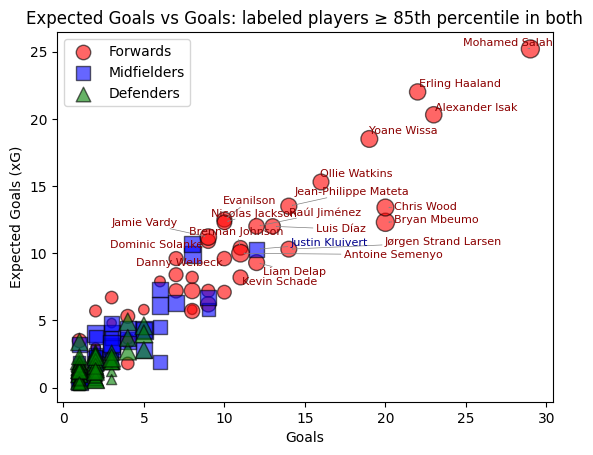

In [43]:
plt.scatter(df_fw[x_col], 
            df_fw[y_col],
            s=df_fw[size_col] / size_scale, 
            c="red", 
            marker="o",
            edgecolor="k", 
            alpha=alpha, 
            label="Forwards")


plt.scatter(df_mf[x_col], 
            df_mf[y_col],
            s=df_mf[size_col] / size_scale, 
            c="blue", 
            marker="s",
            edgecolor="k", 
            alpha=alpha, 
            label="Midfielders")

plt.scatter(df_df[x_col], 
            df_df[y_col],
            s=df_df[size_col] / size_scale, 
            c="green",
              marker="^",
            edgecolor="k", 
            alpha=alpha, 
            label="Defenders")


texts = []
elite_fw = df_fw[(df_fw[x_col] >= x_thr) & (df_fw[y_col] >= y_thr)]
elite_mf = df_mf[(df_mf[x_col] >= x_thr) & (df_mf[y_col] >= y_thr)]
elite_df = df_df[(df_df[x_col] >= x_thr) & (df_df[y_col] >= y_thr)]

for _, r in elite_fw.iterrows():
    texts.append(plt.text(r[x_col], r[y_col], r["Player"], fontsize=8, color="darkred"))
for _, r in elite_mf.iterrows():
    texts.append(plt.text(r[x_col], r[y_col], r["Player"], fontsize=8, color="darkblue"))
for _, r in elite_df.iterrows():
    texts.append(plt.text(r[x_col], r[y_col], r["Player"], fontsize=8, color="darkgreen"))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))


plt.title(f"Expected Goals vs Goals: labeled players ≥ {int(top_pct*100)}th percentile in both")
plt.xlabel("Goals")
plt.ylabel("Expected Goals (xG)")
plt.legend()


plt.savefig("../figures/goals_vs_xg.png", dpi=300, bbox_inches="tight")
plt.show()

